In [116]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

TASK 1:

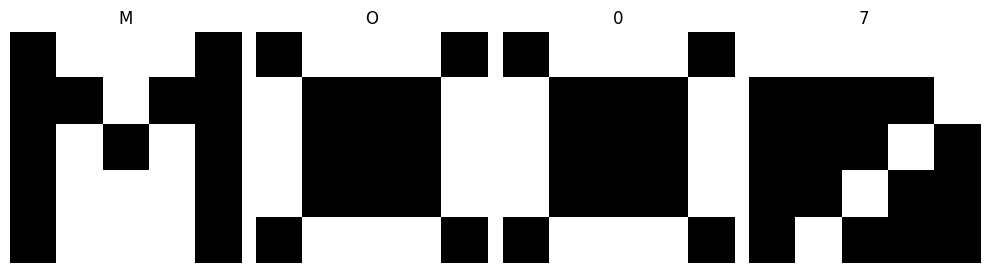

In [117]:
Letter_M = np.array([
    [0, 255, 255, 255, 0],
    [0, 0, 255, 0, 0],
    [0, 255, 0, 255, 0],
    [0, 255, 255, 255, 0],
    [0, 255, 255, 255, 0]
])


Letter_O = np.array([
    [0, 255, 255, 255, 0],
    [255, 0, 0, 0, 255],
    [255, 0, 0, 0, 255],
    [255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0]
])

Number_0 = np.array([
    [0, 255, 255, 255, 0],
    [255, 0, 0, 0, 255],
    [255, 0, 0, 0, 255],
    [255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0]
])

Number_7 = np.array([
    [255, 255, 255, 255, 255],
    [0, 0, 0, 0, 255],
    [0, 0, 0, 255, 0],
    [0, 0, 255, 0, 0],
    [0, 255, 0, 0, 0]
])


# Plotting the corrected grayscale code: M O 0 7
plt.figure(figsize=(10, 4))

plt.subplot(1, 4, 1)
plt.imshow(Letter_M, cmap='gray')
plt.axis('off')
plt.title("M")

plt.subplot(1, 4, 2)
plt.imshow(Letter_O, cmap='gray')
plt.axis('off')
plt.title("O")

plt.subplot(1, 4, 3)
plt.imshow(Number_0, cmap='gray')
plt.axis('off')
plt.title("0")

plt.subplot(1, 4, 4)
plt.imshow(Number_7, cmap='gray')
plt.axis('off')
plt.title("7")

plt.tight_layout()
plt.show()


task2:

In [118]:
from google.colab import drive
import os

drive.mount('/content/drive')

# Pathlist
s_dir = '/content/drive/My Drive/Hati pics/'  # Source
d_dir = '/content/drive/My Drive/Processed_Hati pics/'  # Destination

os.makedirs(d_dir, exist_ok=True)

#files
listu = os.listdir(s_dir)
print(" Found Images :", listu)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Images found: ['hati.jpg', 'images.jpg', 'images (1).jpg', 'download (1).jpg', '360_F_530965513_TgAkLBByRIWFbd7AgEpwV01AvoYfLPJS.jpg', 'images (2).jpg', 'images (3).jpg', 'Wan_Mai_5.jpg', 'Baby-elephant-c-Diana-Robinson-Getty-Images-1292x1081.jpg', 'd2bf7699c02157cdcb1b7be0ae18dbe5.jpg', 'ff1017a112a3dbbc6075d89b821dc3dd.jpg']


In [119]:
!pip install opencv-python


In [120]:
def crop_image(img):

  new_img = img[150:253, 150:287]

  print(f"Cropped Image Shape: {new_img.shape}")

  return new_img


In [121]:
def rotate_image(img):

  r,c = img.shape[:2]

  matrix = cv2.getRotationMatrix2D((c/2,r/2),-90,0.5)

  return cv2.warpAffine(img,matrix,(c,r))

In [122]:
#shear
def shear_image(img):
  h, w= img.shape[:2]

  shear_by_x = 0.75

  shear_by_y = 0.25

  shear_matrix = np.float32([
    [1, shear_by_x, 0],
    [shear_by_y, 1, 0]
    ])

  return cv2.warpAffine(img, shear_matrix, (w + int(shear_by_x * h), h))


In [123]:
#flip
def flip_image(img):

  return cv2.flip(img, 1)

In [126]:
#shift
def shifted_image(img):
  shiftx = 60
  shifty = 30
  translation_matrix = np.float32([[1, 0, shiftx],
                                  [0, 1, shifty]])

  return cv2.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0]))

In [131]:
#2
for filename in listu:
    if filename.lower().endswith(('png', 'jpg', 'jpeg')):
        img_path = os.path.join(s_dir, filename)
        print(f"loading image: {img_path}")

        img = cv2.imread(img_path)

        if img is None:
            print(f" loading failed  {filename}. Skipped")
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#for cropped
        cropped_img = crop_image(img_rgb)


#for rotation
        rotated_img = rotate_image(img_rgb)
#shear
        sheared_img = shear_image(img_rgb)
#flip
        flipped_img = flip_image(img_rgb)
#shift
        shift_img = shifted_image(img_rgb)

        d_path = os.path.join(d_dir, filename)

        plt.imsave(d_path, img_rgb)

        fig, axs = plt.subplots(2, 3, figsize=(15, 10))

        axs[0, 0].imshow(cropped_img)
        axs[0, 0].set_title('Cropped Image')
        axs[0, 0].axis('off')

        axs[0, 1].imshow(rotated_img)
        axs[0, 1].set_title('Rotated Image')
        axs[0, 1].axis('off')




        axs[1, 1].imshow(sheared_img)
        axs[1, 1].set_title('Sheared Image')
        axs[1, 1].axis('off')


        axs[1, 0].imshow(shift_img)
        axs[1, 0].set_title('Shifted Image')
        axs[1, 0].axis('off')

        axs[0, 2].imshow(flipped_img)
        axs[0, 2].set_title('Flipped Image')
        axs[0, 2].axis('off')

        axs[1, 2].imshow(img_rgb)
        axs[1, 2].set_title('Original Image')
        axs[1, 2].axis('off')

        plt.tight_layout()
        plt.show()

        print(f"final output {filename}.")

print("All tasks completed.")

Output hidden; open in https://colab.research.google.com to view.

In [137]:
# 3 & 4

prob = 0.02

for filename in listu:
    if filename.endswith(('png', 'jpg', 'jpeg')):
        img_path = os.path.join(s_dir, filename)

        img = cv2.imread(img_path, cv2.IMREAD_COLOR)

        if img is None:
            print(f"Failed to load image {filename}. Skipping...")
            continue


        noisy_image = np.copy(img)


        salt_ratio = np.random.uniform(0.3, 0.7)
        salt = int(prob * img.size * salt_ratio)

        pepper = int(prob * img.size * (1 - salt_ratio))


        coords = [np.random.randint(0, i - 1, salt) for i in img.shape]
        noisy_image[coords[0], coords[1]] = [255,0,255]

        coords = [np.random.randint(0, i - 1, pepper) for i in img.shape]

        noisy_image[coords[0], coords[1]] = [255,0,0]

        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)

        plt.title(f"Main Image: {filename}")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        plt.subplot(1, 2, 2)
        plt.title(f"Image with Salt-and-Pepper Noise: {filename}")
        plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))

        plt.show()

         # Ploting Histogram
        plt.figure(figsize=(10, 5))
        plt.hist(noisy_image.ravel(), bins=50, alpha=0.6, color='g')
        plt.title(f"Histogram of Noisy Image: {filename}")

        plt.xlabel('Pixel Intensity')

        plt.ylabel('Frequency')
        plt.show()

        print(f"Processed {filename}.")

        print(f"Processed {filename}.")

print("All images processed and displayed.")

Output hidden; open in https://colab.research.google.com to view.

In [140]:
#task3:
#1

from google.colab import drive

s_dir = '/content/drive/My Drive/task3/'
d_dir = '/content/drive/My Drive/task3/'

os.makedirs(d_dir, exist_ok = True)

listu = os.listdir(s_dir)
print("Images in source destination :", listu)

Images in source destination : ['nature.avif', 'natu.jpg', 'nat.jpg', 'nature-3082832_1280.jpg']


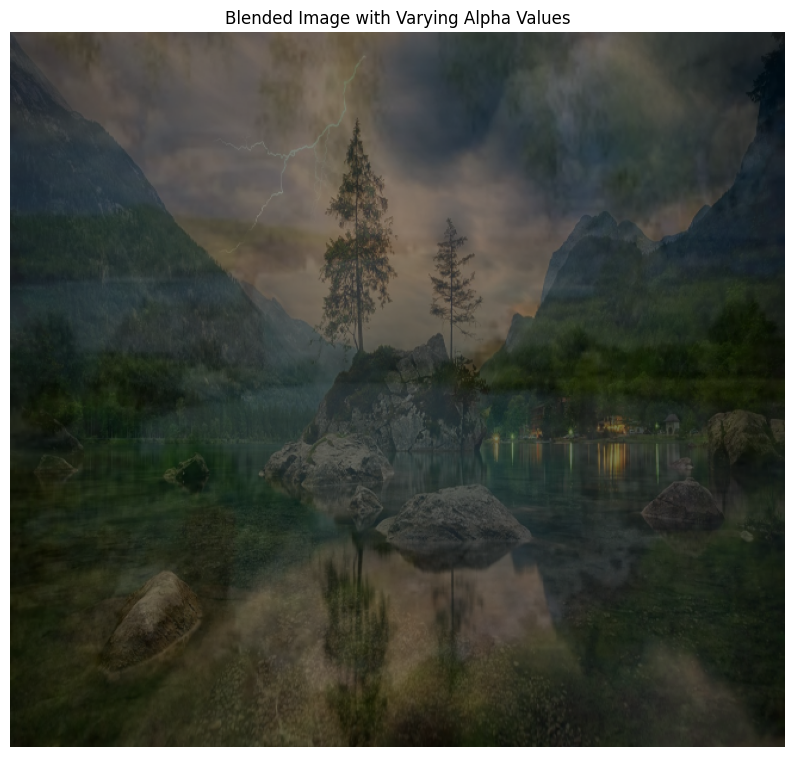

Blended image is being created.


In [144]:
#2

images = []

img_files = [filename for filename in listu if filename.lower().endswith(('png', 'jpg', 'jpeg','avif'))]

for filename in img_files:
    img_path = os.path.join(s_dir, filename)

    img = cv2.imread(img_path)

    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        images.append(img_rgb)

resize_dim = (650, 600)
images_resized = [cv2.resize(img, resize_dim) for img in images]

alpha_values = np.random.uniform(0.2, 1, size=(len(images_resized),))

alpha_values = alpha_values / np.sum(alpha_values)

output_image = images_resized[0]

for i in range(1, len(images_resized)):
    output_image = cv2.addWeighted(output_image, alpha_values[i-1], images_resized[i], alpha_values[i], 0)

plt.figure(figsize=(10, 15))


plt.title('Blended Image with Varying Alpha Values')
plt.imshow(output_image)
plt.axis('off')
plt.show()

output_path = '/content/drive/My Drive/Task3/blended_image.jpg'
cv2.imwrite(output_path, cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR))

print(f"Blended image is created.")

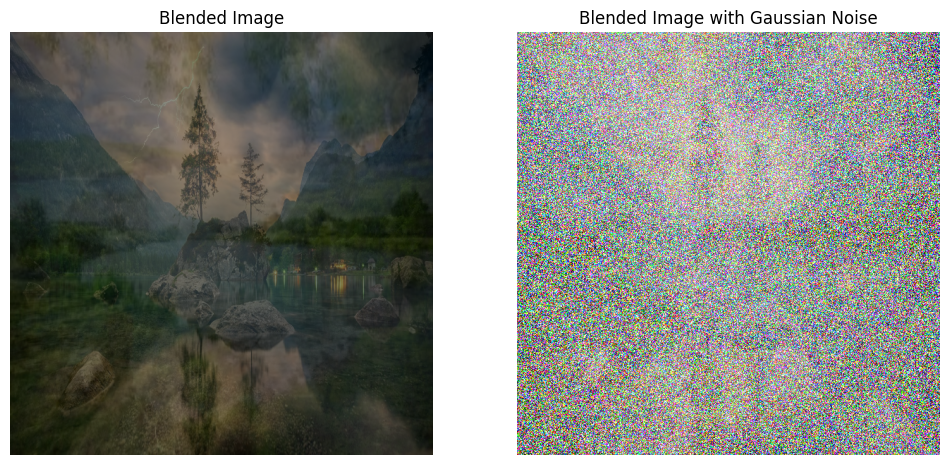

In [63]:
#3

mean = 0
sigma = 10
noise = np.random.normal(mean, sigma, output_image.shape).astype(np.uint8)
noisy_blended_image = cv2.add(output_image, noise)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Blended Image')
plt.imshow(output_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Blended Image with Gaussian Noise')
plt.imshow(noisy_blended_image)
plt.axis('off')

plt.show()

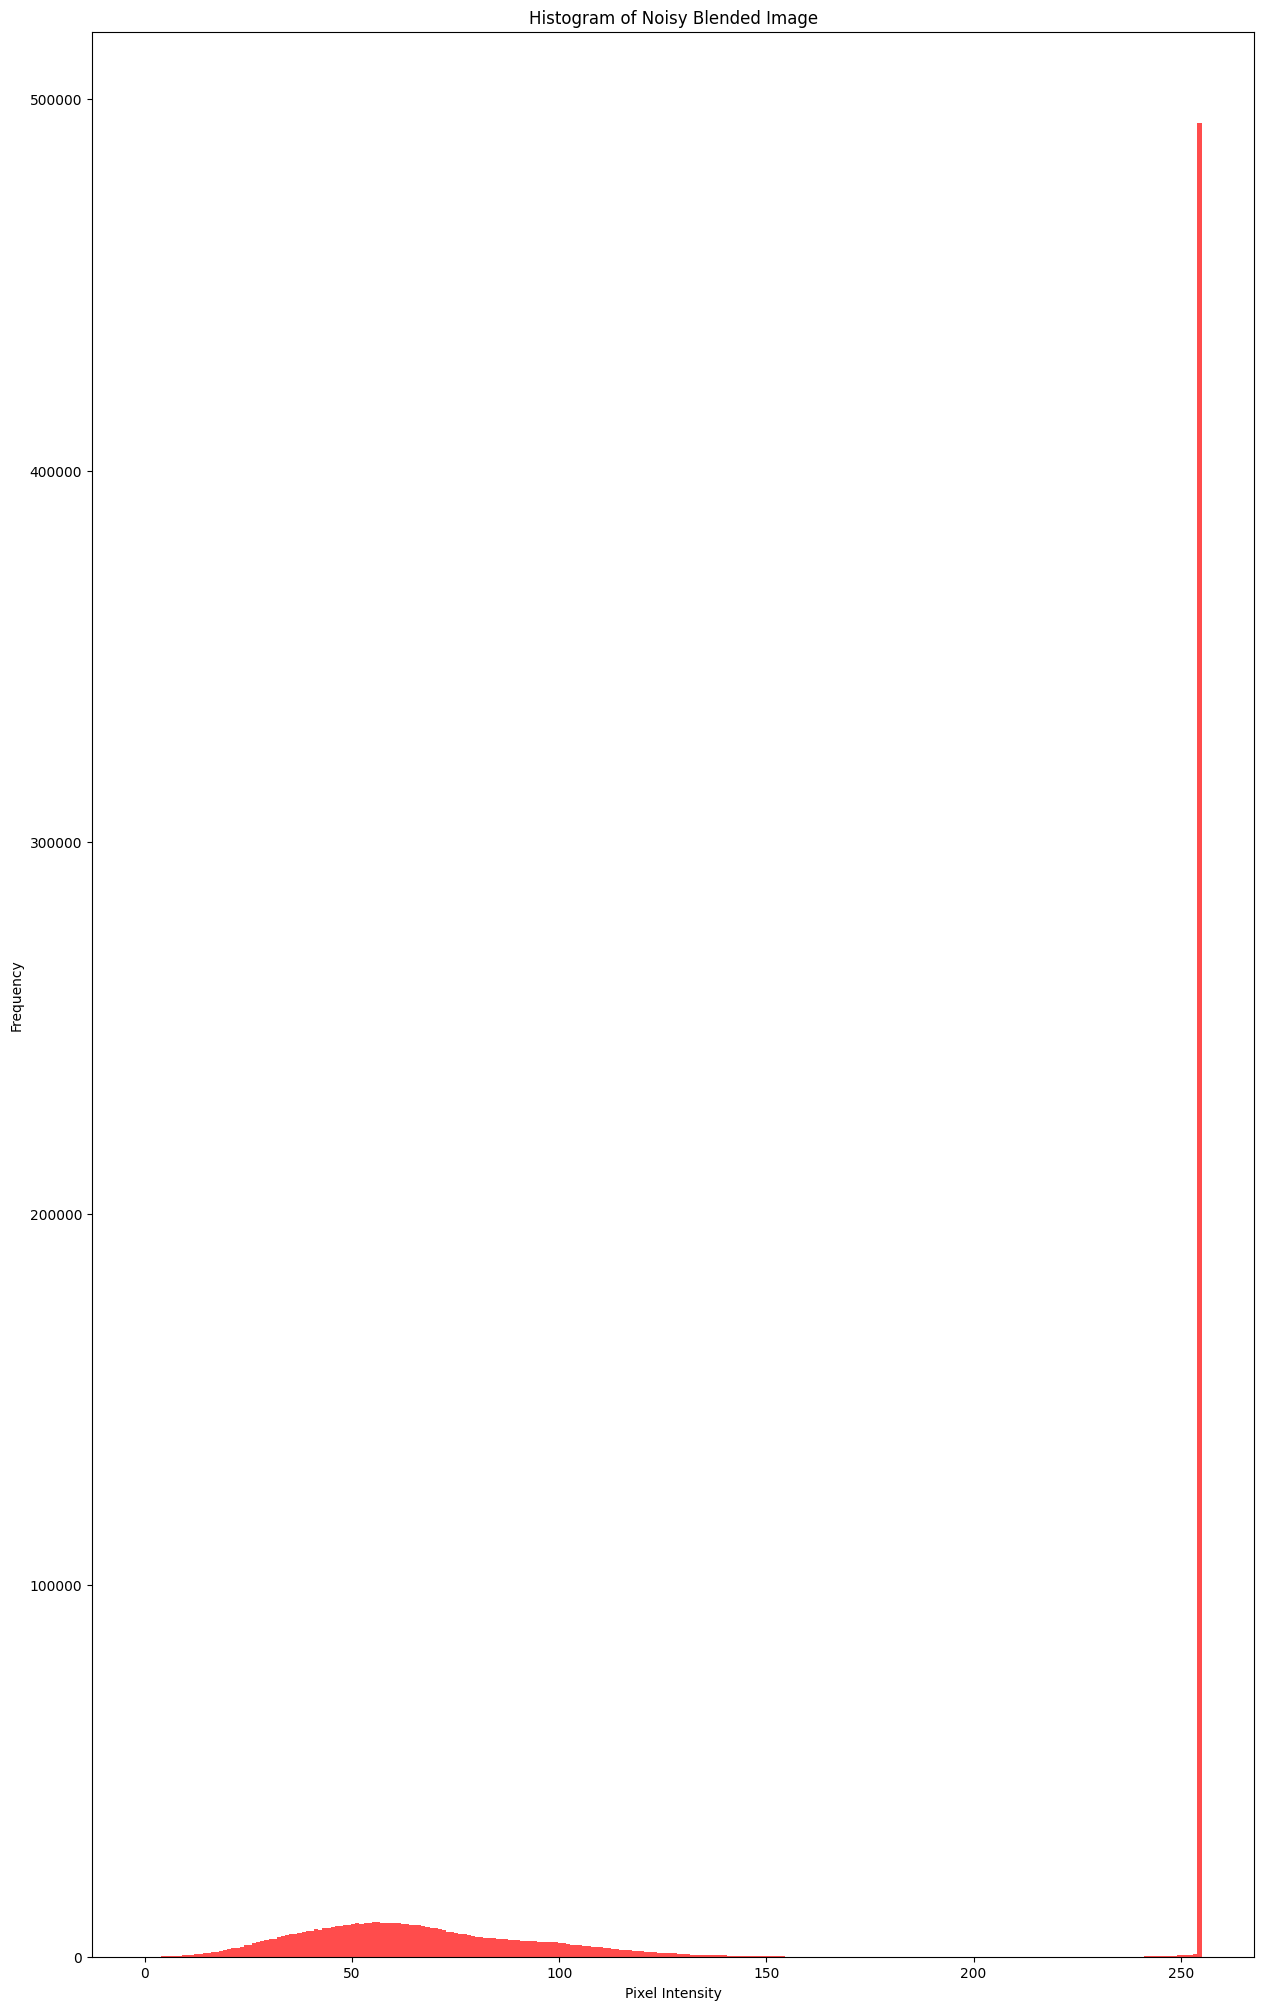

In [147]:
#4

# Histogram
plt.figure(figsize=(15, 25))
plt.hist(noisy_blended_image.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Histogram of Noisy Blended Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()